Import Library

In [13]:
# ======================================
# Import library yang dibutuhkan
# ======================================

import csv
import numpy as np
import matplotlib.pyplot as plt

Jumlah & Nama Linguistik

In [14]:
# =========================
# Jumlah & Nama Linguistik
# =========================

harga_linguistik = ["Murah", "Sedang", "Mahal"]
performa_linguistik = ["Rendah", "Sedang", "Tinggi"]
output_linguistik = ["Rendah", "Sedang", "Tinggi"]

print("Harga:", harga_linguistik)
print("Performa:", performa_linguistik)
print("Kelayakan:", output_linguistik)

Harga: ['Murah', 'Sedang', 'Mahal']
Performa: ['Rendah', 'Sedang', 'Tinggi']
Kelayakan: ['Rendah', 'Sedang', 'Tinggi']


Fungsi Keanggotaan

In [15]:
# ======================================
# Fungsi keanggotaan segitiga
# Digunakan untuk fuzzifikasi
# ======================================

def triangular(x, a, b, c):
    if x <= a or x >= c:
        return 0
    elif a < x <= b:
        return (x - a) / (b - a)
    else:
        return (c - x) / (c - b)

Visualisasi Fungsi Keanggotaan

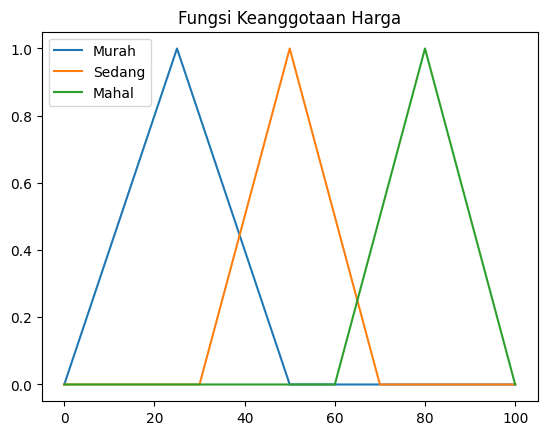

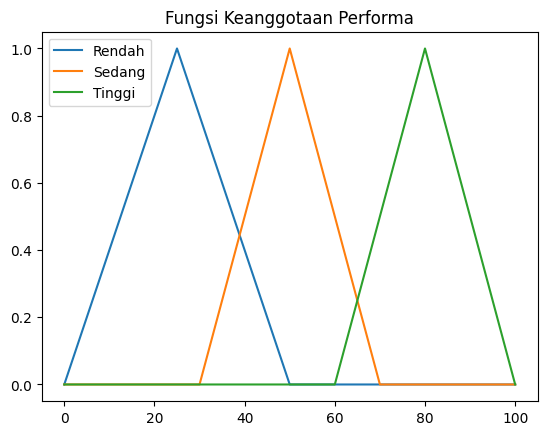

In [16]:
x = np.arange(0, 101, 1)

# Harga
murah = [triangular(i, 0, 25, 50) for i in x]
sedang = [triangular(i, 30, 50, 70) for i in x]
mahal = [triangular(i, 60, 80, 100) for i in x]

plt.plot(x, murah, label="Murah")
plt.plot(x, sedang, label="Sedang")
plt.plot(x, mahal, label="Mahal")
plt.title("Fungsi Keanggotaan Harga")
plt.legend()
plt.show()

# Performa
rendah = [triangular(i, 0, 25, 50) for i in x]
sedang_p = [triangular(i, 30, 50, 70) for i in x]
tinggi = [triangular(i, 60, 80, 100) for i in x]

plt.plot(x, rendah, label="Rendah")
plt.plot(x, sedang_p, label="Sedang")
plt.plot(x, tinggi, label="Tinggi")
plt.title("Fungsi Keanggotaan Performa")
plt.legend()
plt.show()

Aturan Inferensi

In [17]:
rules = [
    "IF Performa Tinggi AND Harga Murah THEN Kelayakan Tinggi",
    "IF Performa Tinggi AND Harga Sedang THEN Kelayakan Tinggi",
    "IF Performa Sedang AND Harga Murah THEN Kelayakan Sedang",
    "IF Performa Sedang AND Harga Sedang THEN Kelayakan Sedang",
    "IF Performa Rendah OR Harga Mahal THEN Kelayakan Rendah"
]

print("Aturan Inferensi:")
for r in rules:
    print("-", r)

Aturan Inferensi:
- IF Performa Tinggi AND Harga Murah THEN Kelayakan Tinggi
- IF Performa Tinggi AND Harga Sedang THEN Kelayakan Tinggi
- IF Performa Sedang AND Harga Murah THEN Kelayakan Sedang
- IF Performa Sedang AND Harga Sedang THEN Kelayakan Sedang
- IF Performa Rendah OR Harga Mahal THEN Kelayakan Rendah


Fuzzifikasi Input

In [18]:
# =====================================
# Fuzzifikasi harga laptop
# ======================================

def fuzzifikasi_harga(x):
    return {
        "murah": triangular(x, 0, 25, 50),
        "sedang": triangular(x, 30, 50, 70),
        "mahal": triangular(x, 60, 80, 100)
    }

# ======================================
# Fuzzifikasi performa laptop
# ======================================

def fuzzifikasi_performa(x):
    return {
        "rendah": triangular(x, 0, 25, 50),
        "sedang": triangular(x, 30, 50, 70),
        "tinggi": triangular(x, 60, 80, 100)
    }


Mamdani (Inferensi & Defuzzifikasi)

In [21]:
def inferensi_mamdani(p, h):
    rendah = max(p["rendah"], h["mahal"])
    sedang = max(min(p["sedang"], h["murah"]),
                 min(p["sedang"], h["sedang"]))
    tinggi = max(min(p["tinggi"], h["murah"]),
                 min(p["tinggi"], h["sedang"]))
    return {"rendah": rendah, "sedang": sedang, "tinggi": tinggi}

def defuzzifikasi_mamdani(out):
    nilai = {"rendah":25, "sedang":50, "tinggi":85}
    return sum(out[k]*nilai[k] for k in out) / sum(out.values())

Sugeno

In [22]:
def inferensi_sugeno(p, h):
    rules = []
    rules.append((min(p["tinggi"], h["murah"]), 90))
    rules.append((min(p["tinggi"], h["sedang"]), 85))
    rules.append((min(p["sedang"], h["murah"]), 75))
    rules.append((min(p["sedang"], h["sedang"]), 70))
    rules.append((max(p["rendah"], h["mahal"]), 40))
    return rules

def defuzzifikasi_sugeno(rules):
    return sum(a*z for a,z in rules) / sum(a for a,z in rules)

Proses Dataset & Perbandingan

In [23]:
hasil = []

with open("laptop.csv") as file:
    reader = csv.DictReader(file)
    for row in reader:
        h = float(row["harga"])
        p = float(row["performa"])

        fh = fuzzifikasi_harga(h)
        fp = fuzzifikasi_performa(p)

        mamdani = defuzzifikasi_mamdani(inferensi_mamdani(fp, fh))
        sugeno = defuzzifikasi_sugeno(inferensi_sugeno(fp, fh))

        hasil.append([row["id_laptop"], round(mamdani,2), round(sugeno,2)])

for h in hasil:
    print(h)

['L01', 25.0, 40.0]
['L02', 85.0, 85.0]
['L03', 50.0, 72.22]
['L04', 25.0, 40.0]
['L05', 85.0, 85.0]
['L06', 50.0, 75.0]
['L07', 25.0, 40.0]
['L08', 67.5, 79.72]
['L9', 55.0, 62.5]
['L10', 78.0, 82.0]
['L11', 50.0, 73.53]
['L12', 25.0, 40.0]


Grafik Perbandingan

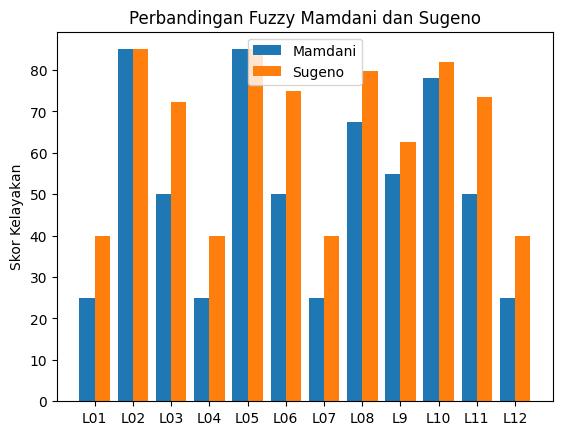

In [25]:
ids = [h[0] for h in hasil]
mamdani = [h[1] for h in hasil]
sugeno = [h[2] for h in hasil]

x = range(len(ids))

plt.bar(x, mamdani, width=0.4, label="Mamdani")
plt.bar([i+0.4 for i in x], sugeno, width=0.4, label="Sugeno")
plt.xticks([i+0.2 for i in x], ids)
plt.ylabel("Skor Kelayakan")
plt.title("Perbandingan Fuzzy Mamdani dan Sugeno")
plt.legend()
plt.show()